# PART 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df  = pd.read_csv("/content/drive/MyDrive/CIS 519/CIS 519 Final Project/dataset.csv")
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [ ]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [ ]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113999.000000,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,56999.421925,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034
std,32909.243463,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623
min,0.000000,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.500000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000
50%,56999.000000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.500000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


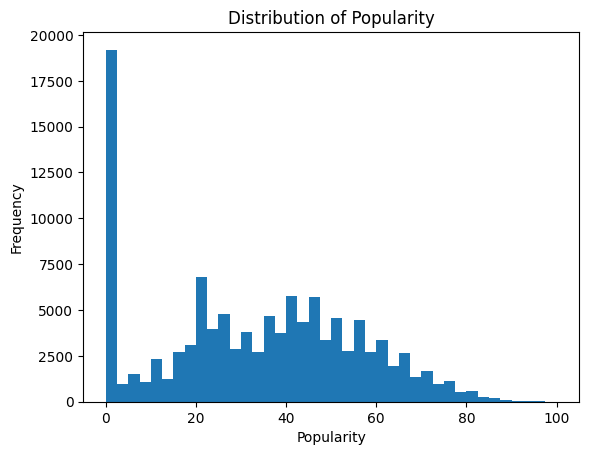

In [ ]:
plt.hist(df['popularity'], bins=40)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# encoding explicit to binary 0/1

df['explicit'] = df['explicit'].apply(lambda x: 1 if x else 0)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df.drop('popularity', axis=1)  # features
y = df['popularity']  # target

X = X.drop(columns =['Unnamed: 0', 'track_id', 'artists'])

In [ ]:
X = pd.get_dummies(X, columns=['track_genre'], dtype=int) # has all of the features + encoded genres
X_without_dummies = df.drop('popularity', axis=1)  # has all of the features
X_without_dummies = X_without_dummies.drop(columns =['Unnamed: 0', 'track_id', 'artists'])

In [ ]:
X.dtypes

album_name                  object
track_name                  object
duration_ms                  int64
explicit                     int64
danceability               float64
                            ...   
track_genre_techno           int64
track_genre_trance           int64
track_genre_trip-hop         int64
track_genre_turkish          int64
track_genre_world-music      int64
Length: 130, dtype: object

In [ ]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [ ]:
df.dtypes

Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit              int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [ ]:
X = X.select_dtypes(include=['int', 'int32', 'int64', 'float', 'float32', 'float64', 'uint8'])
X_without_dummies = X_without_dummies.select_dtypes(include=['int', 'int32', 'int64', 'float', 'float32', 'float64'])

In [ ]:
X

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,...,0,0,0,0,0,0,0,0,0,0
1,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,...,0,0,0,0,0,0,0,0,0,0
2,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,...,0,0,0,0,0,0,0,0,0,0
4,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,384999,0,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,...,0,0,0,0,0,0,0,0,0,1
113996,385000,0,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,...,0,0,0,0,0,0,0,0,0,1
113997,271466,0,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,...,0,0,0,0,0,0,0,0,0,1
113998,283893,0,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_wd, X_test_wd, y_train_wd, y_test_wd = train_test_split(X_without_dummies, y, test_size=0.2, random_state=42)

scaler_wd = StandardScaler()
X_train_scaled_wd = scaler_wd.fit_transform(X_train_wd)
X_test_scaled_wd = scaler_wd.transform(X_test_wd)

In [ ]:
X_train

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
96253,358733,0,0.641,0.880,11,-6.401,0,0.0604,0.1510,0.000761,...,0,0,0,0,0,0,0,0,0,0
70417,231520,0,0.668,0.361,5,-9.710,0,0.0353,0.7950,0.000000,...,0,0,0,0,0,0,0,0,0,0
66688,98386,0,0.786,0.225,9,-16.516,1,0.5730,0.6790,0.000000,...,0,0,0,0,0,0,0,0,0,0
51391,232173,0,0.709,0.829,0,-5.817,1,0.2450,0.0698,0.000000,...,0,0,0,0,0,0,0,0,0,0
95123,360320,0,0.786,0.702,0,-6.742,1,0.0456,0.5110,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76821,238546,0,0.502,0.190,10,-11.985,1,0.0363,0.9200,0.858000,...,0,0,0,0,0,0,0,0,0,0
110269,310067,0,0.559,0.924,7,-5.017,1,0.0674,0.0105,0.884000,...,0,0,0,0,0,0,1,0,0,0
103695,136306,0,0.629,0.560,0,-11.455,0,0.0523,0.5950,0.000000,...,0,0,0,0,0,0,0,0,0,0
860,216841,0,0.421,0.107,6,-15.191,1,0.0335,0.9480,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Instantiate an XGBoost regressor object
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')

# Train the model
xgb_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgb_reg.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 323.7822767914103


In [ ]:
# Instantiate an XGBoost regressor object
xgb_reg_wd = xgb.XGBRegressor(objective='reg:squarederror')

# Train the model
xgb_reg_wd.fit(X_train_scaled_wd, y_train_wd)

# Make predictions
y_pred_wd = xgb_reg_wd.predict(X_test_scaled_wd)

# Evaluate the model
mse_wd = mean_squared_error(y_test_wd, y_pred_wd)
print(f'Mean Squared Error: {mse_wd}')

Mean Squared Error: 367.4520555055444


In [ ]:
def accuracy_within_threshold(y_test, y_pred, threshold):
    """
    Calculate the percentage of predictions that are within +/- threshold of the actual values.

    :param y_test: Array-like, true values.
    :param y_pred: Array-like, predicted values.
    :param threshold: Numeric, the threshold for accuracy calculation.
    :return: Float, percentage of predictions within the threshold.
    """
    # Calculate the absolute difference between actual and predicted values
    diff = abs(y_test - y_pred)

    # Count how many predictions fall within the threshold
    within_threshold = sum(diff <= threshold)

    # Calculate the percentage
    accuracy = (within_threshold / len(y_test)) * 100

    return accuracy

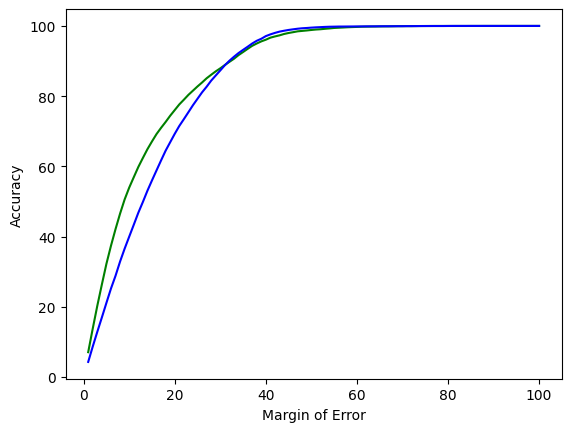

In [ ]:
def graph_accuracy_versus_threshold(range_of_vals, y_test, y_pred, color):
  vals = []
  for cur in range(1, range_of_vals + 1):
    vals.append(accuracy_within_threshold(y_test, y_pred, cur))
  plt.plot(range(1, range_of_vals + 1), vals, color = color)
  plt.xlabel('Margin of Error')
  plt.ylabel('Accuracy')

# with genre one-hot encoding
graph_accuracy_versus_threshold(100, y_test, y_pred, "green")

# without genre altogether
graph_accuracy_versus_threshold(100, y_test_wd, y_pred_wd, "blue")

In [ ]:
# Get feature importances
feature_importances = xgb_reg.feature_importances_

# Match feature names to their importances
feature_names = X.columns
importance_dict = dict(zip(feature_names, feature_importances))

sorteddisc = dict(sorted(importance_dict.items(), key=lambda item: item[1], reverse=True))

# Print feature importances
for name, importance in sorteddisc.items():
    print(f"{name}: {importance}")

track_genre_iranian: 0.05506172776222229
track_genre_romance: 0.05219126120209694
track_genre_latin: 0.036025915294885635
track_genre_pop-film: 0.03492916002869606
track_genre_chicago-house: 0.03309081867337227
track_genre_detroit-techno: 0.03156430274248123
track_genre_sad: 0.028871240094304085
track_genre_chill: 0.02882278524339199
track_genre_k-pop: 0.028304563835263252
track_genre_classical: 0.023559462279081345
track_genre_jazz: 0.02333269827067852
track_genre_grindcore: 0.021539831534028053
track_genre_honky-tonk: 0.020315296947956085
track_genre_idm: 0.017607886344194412
track_genre_kids: 0.017561370506882668
track_genre_country: 0.017070893198251724
track_genre_emo: 0.01641213707625866
track_genre_anime: 0.016103800386190414
track_genre_indian: 0.01572159305214882
track_genre_tango: 0.014158410020172596
track_genre_grunge: 0.01367015577852726
track_genre_soul: 0.013375307433307171
track_genre_breakbeat: 0.013077395968139172
track_genre_pop: 0.012824030593037605
track_genre_part

In [ ]:
# Get feature importances
feature_importances = xgb_reg_wd.feature_importances_

# Match feature names to their importances
feature_names = X_without_dummies.columns
importance_dict = dict(zip(feature_names, feature_importances))

sorteddisc = dict(sorted(importance_dict.items(), key=lambda item: item[1], reverse=True))

# Print feature importances
for name, importance in sorteddisc.items():
    print(f"{name}: {importance}")

explicit: 0.11594360321760178
acousticness: 0.08888020366430283
time_signature: 0.08230465650558472
instrumentalness: 0.08042598515748978
danceability: 0.07778016477823257
speechiness: 0.07207983732223511
valence: 0.07179949432611465
energy: 0.07147017121315002
duration_ms: 0.06837005168199539
tempo: 0.06472644209861755
loudness: 0.06306064873933792
liveness: 0.059244200587272644
key: 0.04605646803975105
mode: 0.037857990711927414


Perform PCA to reduce the dimensionality from genre encoding

Number of components: 5, MSE: 413.49173217579937
Number of components: 10, MSE: 393.39393355913967
Number of components: 15, MSE: 344.87754652045106
Number of components: 20, MSE: 315.60359178536424
Number of components: 25, MSE: 318.6588897963052
Number of components: 30, MSE: 319.36401855952204
Number of components: 35, MSE: 317.77322591015565
Number of components: 40, MSE: 318.3146190630745
Number of components: 45, MSE: 317.5266981556056
Number of components: 50, MSE: 321.1154600112183
Number of components: 55, MSE: 322.1688196750209
Number of components: 60, MSE: 324.0936994980158
Number of components: 65, MSE: 321.71561969679925
Number of components: 70, MSE: 323.6368752010283
Number of components: 75, MSE: 324.7942850219064
Number of components: 80, MSE: 326.8799547695786
Number of components: 85, MSE: 323.5081372424126
Number of components: 90, MSE: 321.34119237965433
Number of components: 95, MSE: 326.27840089402486
Number of components: 100, MSE: 325.4092127320548
Number of c

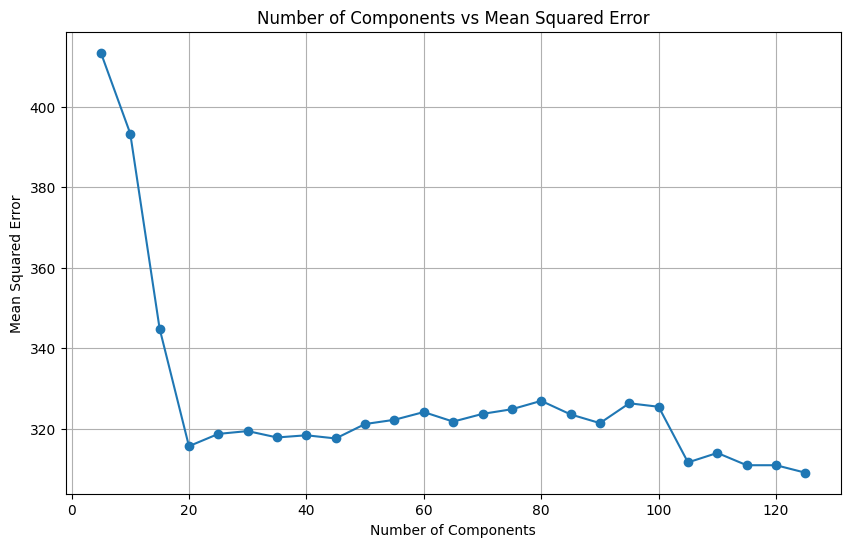

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_components = min(X_train.shape[1], X_train.shape[0])

components_list = []
mse_list = []

for n_components in range(5, max_components + 1, 5):
    pca = PCA(n_components=n_components)

    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')
    xgb_reg.fit(X_train_pca, y_train)

    y_pred = xgb_reg.predict(X_test_pca)
    mse = mean_squared_error(y_test, y_pred)

    components_list.append(n_components)
    mse_list.append(mse)

    print(f'Number of components: {n_components}, MSE: {mse}')

plt.figure(figsize=(10, 6))
plt.plot(components_list, mse_list, marker='o')
plt.title('Number of Components vs Mean Squared Error')
plt.xlabel('Number of Components')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
# encode df
encoded_df = pd.get_dummies(df, columns=['track_genre'], dtype=int)

In [ ]:
# feature engineering

# number of artists in the song
encoded_df['artist_count'] = encoded_df['artists'].apply(lambda x: max(len(x.split(';')),1))

In [ ]:
# total tracks of this artist
tracks_df = encoded_df[['artists','track_id']]
tracks_df = tracks_df.groupby('artists').agg({'track_id':'count'}).reset_index()
tracks_df = tracks_df.rename(columns={'track_id':'tracks_count'})
df_fe = tracks_df.merge(encoded_df, on='artists')
df_fe.head(5)

,artists,tracks_count,track_id,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,artist_count
0,!nvite,2,1d4ZvL8uuUPTEAnocC3zEa,strolling,strolling,41,138875,0,0.857,0.381,...,1,0,0,0,0,0,0,0,0,1
1,!nvite,2,3v6ypsJzaoY2xgYp6mMJfM,pagadoff,pagadoff,5,135860,0,0.784,0.657,...,1,0,0,0,0,0,0,0,0,1
2,"""Puppy Dog Pals"" Cast",2,5qtlopq4SnnvVeiQVt3M0n,Puppy Dog Pals: Disney Junior Music,Puppy Dog Pals Main Title Theme,60,57789,0,0.781,0.936,...,0,0,0,0,0,0,0,0,0,1
3,"""Puppy Dog Pals"" Cast",2,4aY2hh55axhL2qYYqXNoOM,Puppy Dog Pals: Disney Junior Music,Going on a Mission,55,38144,0,0.629,0.776,...,0,0,0,0,0,0,0,0,0,1
4,"""Weird Al"" Yankovic",15,64vs4dpa55X1Z2thSiK3Ad,Running With Scissors,"Grapefruit Diet (Parody of ""Zoot Suit Riot"" by...",29,210306,0,0.738,0.510,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# explode by artists
df_fe['artists'] = df_fe['artists'].apply(lambda x: x.replace(' ','').split(';'))
df_fe = df_fe.explode('artists')
df_fe.head(5)

,artists,tracks_count,track_id,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,artist_count
0,!nvite,2,1d4ZvL8uuUPTEAnocC3zEa,strolling,strolling,41,138875,0,0.857,0.381,...,1,0,0,0,0,0,0,0,0,1
1,!nvite,2,3v6ypsJzaoY2xgYp6mMJfM,pagadoff,pagadoff,5,135860,0,0.784,0.657,...,1,0,0,0,0,0,0,0,0,1
2,"""PuppyDogPals""Cast",2,5qtlopq4SnnvVeiQVt3M0n,Puppy Dog Pals: Disney Junior Music,Puppy Dog Pals Main Title Theme,60,57789,0,0.781,0.936,...,0,0,0,0,0,0,0,0,0,1
3,"""PuppyDogPals""Cast",2,4aY2hh55axhL2qYYqXNoOM,Puppy Dog Pals: Disney Junior Music,Going on a Mission,55,38144,0,0.629,0.776,...,0,0,0,0,0,0,0,0,0,1
4,"""WeirdAl""Yankovic",15,64vs4dpa55X1Z2thSiK3Ad,Running With Scissors,"Grapefruit Diet (Parody of ""Zoot Suit Riot"" by...",29,210306,0,0.738,0.510,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X_fe = df_fe.drop(columns=['popularity'])
y_fe = df_fe[['popularity']]

In [ ]:
# only keep numerical columns
X_fe = X_fe.select_dtypes(include=['int', 'int32', 'int64', 'float', 'float32', 'float64', 'uint8'])

# train test split
X_train, X_test, y_train, y_test = train_test_split(X_fe, y_fe, test_size=0.2, random_state=42)

#scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Instantiate an XGBoost regressor object
xgb_fe = xgb.XGBRegressor(objective='reg:squarederror')

# Train the model
xgb_fe.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgb_fe.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 289.84749535774694


Hyper parameter tuning

In [ ]:
# todo: change these params so that the MSE is better than 289 (above). increase cv and iterations and let it cook

params = {
  'gamma': [0.5, 2, 5],
  'subsample': [0.6, 1.0],
  'max_depth': [3, 5]
}

In [ ]:
xgb_grid = xgb.XGBRegressor(objective='reg:squarederror')

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

xgb_tuned = GridSearchCV(xgb_grid, param_grid=params, scoring='neg_mean_squared_error', cv = 3, verbose=True)

In [ ]:
xgb_tuned.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'gamma': [0.5, 2, 5], 'max_depth': [3, 5],
                         'subsample': [0.6, 1.0]},
             scoring='neg_mean_squared_error', verbose=True)

In [ ]:
# Make predictions
y_pred = xgb_tuned.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 303.90478624120163


In [ ]:
print(-1*xgb_tuned.best_score_)
print(xgb_tuned.best_params_)

300.4815085360713
{'gamma': 2, 'max_depth': 5, 'subsample': 0.6}


In [ ]:
import pandas as pd
import numpy as np

# Sample data
# merged_df = pd.read_csv('path_to_your_dataset.csv')

# Bucket for popularity == 0
bucket_0 = df_fe[df_fe['popularity'] == 0]

# Buckets for non-zero popularity
non_zero_popularity = df_fe[df_fe['popularity'] > 0]
percentiles = non_zero_popularity['popularity'].quantile([1/3, 2/3]).tolist()

# # Creating three non-zero buckets
# bucket_1 = non_zero_popularity[non_zero_popularity['popularity'] <= percentiles[0]]
# bucket_2 = non_zero_popularity[(non_zero_popularity['popularity'] > percentiles[0]) & (non_zero_popularity['popularity'] <= percentiles[1])]
# bucket_3 = non_zero_popularity[non_zero_popularity['popularity'] > percentiles[1]]

# Creating the buckets with hardcoded ranges
bucket_1 = df_fe[(df_fe['popularity'] >= 0) & (df_fe['popularity'] <= 30)]
bucket_2 = df_fe[(df_fe['popularity'] > 30) & (df_fe['popularity'] <= 60)]
bucket_3 = df_fe[(df_fe['popularity'] > 60) & (df_fe['popularity'] <= 100)]

# Selecting numeric types
X = df_fe.select_dtypes(include=['int', 'int32', 'int64', 'float', 'float32', 'float64', 'uint8'])

# Create the target variable for logistic regression
conditions = [
    df_fe['popularity'] == 0,
    df_fe['popularity'] <= percentiles[0],
    (df_fe['popularity'] > percentiles[0]) & (df_fe['popularity'] <= percentiles[1]),
    df_fe['popularity'] > percentiles[1]
]
choices = [0, 1, 2, 3]  # Bucket labels
df_fe['popularity_bucket'] = np.select(conditions, choices)

y = df_fe['popularity_bucket']

In [ ]:
# Print bucket ranges
print(f"Bucket 1 range: 1 to {percentiles[0]}")
print(f"Bucket 2 range: {percentiles[0] + 1} to {percentiles[1]}")
print(f"Bucket 3 range: {percentiles[1] + 1} to 100 (assuming 100 is the max popularity score)")

Bucket 1 range: 1 to 29.0
Bucket 2 range: 30.0 to 48.0
Bucket 3 range: 49.0 to 100 (assuming 100 is the max popularity score)


Accuracy with equal size buckets:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues occur
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.827081867663939


Accuracy with hardcoded ranges:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues occur
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.827711334098567


# PART 2

## Data Collection (Data Contribution)

Note: The lyrics dataset is 3 GB and can not be loaded through traditional methods. So, we processeded the data using Kaggle's compute resources instead. This processing included:

1. Loading the lyrics dataframe
2. Loading the spotify dataframe from contribution 1
3. Exploding the spotify dataframe so that each row has one artists
4. Merging the two dataframes so every row corresponds to a song/artist combination and contains both popularity/numerical song information as well as lyrics

Kaggle Notebook: https://www.kaggle.com/code/aashvimanakiwala/cis-5190-preprocessing-lyrics

In [6]:
# load the merged dataset
merged_df = pd.read_csv("/content/drive/MyDrive/CIS 5190/CIS 519 Final Project/spotify_lyrics.csv")

In [7]:
merged_df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'title', 'tag', 'artist', 'year', 'views', 'features',
       'lyrics', 'id', 'language_cld3', 'language_ft', 'language'],
      dtype='object')

In [8]:
merged_df = merged_df.drop(columns=["Unnamed: 0"])

In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29537 entries, 0 to 29536
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          29537 non-null  object 
 1   artists           29537 non-null  object 
 2   album_name        29537 non-null  object 
 3   track_name        29537 non-null  object 
 4   popularity        29537 non-null  int64  
 5   duration_ms       29537 non-null  int64  
 6   explicit          29537 non-null  bool   
 7   danceability      29537 non-null  float64
 8   energy            29537 non-null  float64
 9   key               29537 non-null  int64  
 10  loudness          29537 non-null  float64
 11  mode              29537 non-null  int64  
 12  speechiness       29537 non-null  float64
 13  acousticness      29537 non-null  float64
 14  instrumentalness  29537 non-null  float64
 15  liveness          29537 non-null  float64
 16  valence           29537 non-null  float6

In [10]:
merged_df['language'].value_counts()

language
en     20948
es      2711
pt      1571
de       535
tr       506
sv       338
fr       313
hi       246
ja       199
fi       110
ko        79
ne        61
it        54
nl        40
id        29
da        21
no        18
pl        17
cs        16
ru        15
pa        13
fil       12
bn        11
ta         7
zh         7
vi         4
fa         3
ga         2
ro         2
is         1
el         1
ml         1
mn         1
ar         1
uk         1
Name: count, dtype: int64

In [11]:
# do we filter for english only?
merged_df = merged_df[merged_df['language']=='en']

In [12]:
# Added column for artists count per song
counts_df = merged_df.groupby('title').agg({'artists':'count'}).reset_index()
counts_df['artists-count'] = counts_df['artists']
counts_df = counts_df.drop(columns = ['artists'])
grouped = merged_df.groupby('title').agg({'artists': 'count', 'track_id': 'first'}).reset_index()
grouped.columns = ['title', 'artist_count', 'track_id']
merged_df = merged_df.merge(grouped, on=['track_id'])

## Sentiment Feature

In [ ]:
# add in columns for sentiment analysis embeddings
from textblob import TextBlob
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")

def classify_sentiment_textblob(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity < 0:
        return 'negative'
    else:
        return 'neutral'

merged_df['lyric-sentiment'] = merged_df['lyrics'].apply(classify_sentiment_textblob)

merged_df.head(10)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,views,features,lyrics,id,language_cld3,language_ft,language,title_y,artist_count,lyric-sentiment
0,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.443,2,...,539229,{},"[Verse 1]\nLoving and fighting\nAccusing, deny...",2973448,en,en,en,Hold On,15,positive
1,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.147,2,...,1402289,"{""Christina Aguilera""}","[Intro: A Great Big World]\nSay something, I'm...",255826,en,en,en,Say Something,12,positive
2,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.147,2,...,1402289,"{""Christina Aguilera""}","[Intro: A Great Big World]\nSay something, I'm...",255826,en,en,en,Say Something,12,positive
3,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.632,1,...,11618,{},[Verse 1]\nOne look and I can’t catch my breat...,2262975,en,en,en,Hunger,2,positive
4,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.632,1,...,11618,{},[Verse 1]\nOne look and I can’t catch my breat...,2262975,en,en,en,Hunger,2,positive
5,4mzP5mHkRvGxdhdGdAH7EJ,Zack Tabudlo,Episode,Give Me Your Forever,74,244800,False,0.627,0.363,8,...,6060,{},[Verse 1]\nDo you remember?\nWhen we were youn...,7254697,en,en,en,Give Me Your Forever,2,positive
6,0X9MxHR1rTkEHDjp95F2OO,Anna Hamilton,Bad Liar,Bad Liar,62,248448,False,0.691,0.234,3,...,1064,{},"Oh, hush, my dear, it's been a difficult year\...",5741236,en,en,en,Bad Liar,4,negative
7,0X9MxHR1rTkEHDjp95F2OO,Anna Hamilton,Bad Liar,Bad Liar,62,248448,False,0.691,0.234,3,...,1064,{},"Oh, hush, my dear, it's been a difficult year\...",5741236,en,en,en,Bad Liar,4,negative
8,6CgNoAbFJ4Q4Id4EjtbXlC,Boyce Avenue,"Cover Sessions, Vol. 4",Photograph,67,260186,False,0.717,0.320,3,...,9751,"{""Bea Miller""}","[Verse 1]\nLoving can hurt, loving can hurt so...",2866640,en,en,en,Photograph,5,positive
9,210JCw2LbYD4YIs8GiZ9iP,Boyce Avenue,"Cover Sessions, Vol. 3",Demons,63,174174,False,0.678,0.351,0,...,8585,{},When the days are cold\nAnd the cards all fold...,1850780,en,en,en,Demons,15,negative


Plot of frequency versus sentiment of songs in dataset

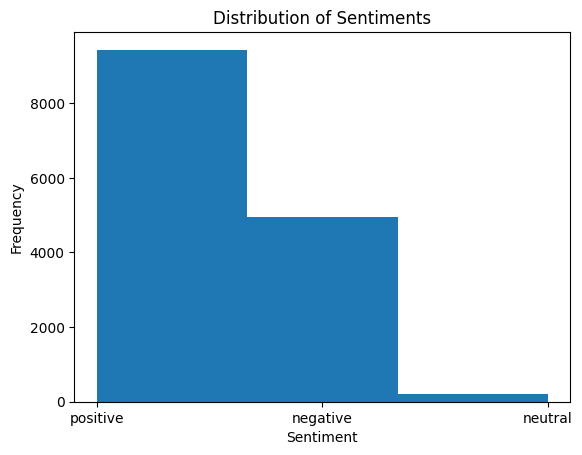

In [ ]:
plt.hist(merged_df['lyric-sentiment'], bins=3)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()



XGBoost model with Feature Importance on New Model -> MSE was reduced to 193.9

In [ ]:
X = merged_df.drop('popularity', axis=1) #features
X = X.drop(columns =['track_id', 'artists', 'album_name', 'track_name'])
X = X.select_dtypes(include=['int', 'int32', 'int64', 'float', 'float32', 'float64', 'uint8'])


y = merged_df['popularity']  # target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')
xgb_reg.fit(X_train_scaled, y_train)
y_pred = xgb_reg.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


# Get feature importances
feature_importances = xgb_reg.feature_importances_

# Match feature names to their importances
feature_names = X.columns
importance_dict = dict(zip(feature_names, feature_importances))

sorteddisc = dict(sorted(importance_dict.items(), key=lambda item: item[1], reverse=True))

# Print feature importances
for name, importance in sorteddisc.items():
    print(f"{name}: {importance}")

Mean Squared Error: 186.63736213042816
views: 0.21578362584114075
artist_count: 0.16192109882831573
year: 0.08119756728410721
id: 0.053465183824300766
acousticness: 0.04871005937457085
valence: 0.04867599532008171
instrumentalness: 0.0478605255484581
loudness: 0.045926980674266815
danceability: 0.04336702823638916
speechiness: 0.042521338909864426
energy: 0.03562619909644127
mode: 0.03513338416814804
tempo: 0.03432301804423332
liveness: 0.030450036749243736
key: 0.030079953372478485
duration_ms: 0.02710634469985962
time_signature: 0.01785164885222912


Neural Network Model for Regression

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score

# Example: load the merged_df DataFrame (assuming it's already loaded)

# Selecting the features and target
X = merged_df.drop(columns=['popularity', 'track_id', 'artists', 'album_name', 'track_name'])
X = X.select_dtypes(include=['int', 'int32', 'int64', 'float', 'float32', 'float64', 'uint8'])
y = merged_df['popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Defined the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Mean Absolute Error on test set: {mae}')

# Make predictions
predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

# create a dataframe with the comparisons
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions.flatten()})


KeyboardInterrupt: 

In [5]:
model = Sequential()
model.add(Dense(64, input_dim=17, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3265 (12.75 KB)
Trainable params: 3265 (12.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


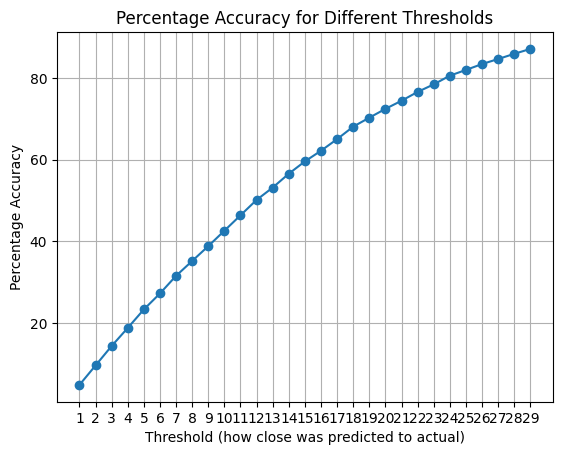

In [ ]:
# Here, after running our neural network model, we ran an analysis to determine how the threshold
# of accuracy (how close the actual and predicted values must be) impacted the percentage
# of correctly identified songs

results['difference'] = abs(results['Actual'] - results['Predicted'])
total_rows = len(results)
# Initialize an empty list to store percentage accuracy for each threshold
percentage_accuracy = []

# Iterate through threshold values from 1 to 10
for threshold in range(1, 30):
    # Filter the DataFrame based on the current threshold
    within_threshold_count = len(results[results['difference'] <= threshold])

    # Calculate the percentage accuracy for the current threshold
    percentage = (within_threshold_count / total_rows) * 100

    # Append the percentage accuracy to the list
    percentage_accuracy.append(percentage)

# Plot the percentage accuracy for different threshold values
plt.plot(range(1, 30), percentage_accuracy, marker='o')
plt.xlabel('Threshold (how close was predicted to actual)')
plt.ylabel('Percentage Accuracy')
plt.title('Percentage Accuracy for Different Thresholds')
plt.grid(True)
plt.xticks(range(1, 30))
plt.show()

## Logistic Regression


In [ ]:
merged_df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,views,features,lyrics,id,language_cld3,language_ft,language,title_y,artist_count,lyric-sentiment
0,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.443,2,...,539229,{},"[Verse 1]\nLoving and fighting\nAccusing, deny...",2973448,en,en,en,Hold On,15,positive
1,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.147,2,...,1402289,"{""Christina Aguilera""}","[Intro: A Great Big World]\nSay something, I'm...",255826,en,en,en,Say Something,12,positive
2,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.147,2,...,1402289,"{""Christina Aguilera""}","[Intro: A Great Big World]\nSay something, I'm...",255826,en,en,en,Say Something,12,positive
3,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.632,1,...,11618,{},[Verse 1]\nOne look and I can’t catch my breat...,2262975,en,en,en,Hunger,2,positive
4,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.632,1,...,11618,{},[Verse 1]\nOne look and I can’t catch my breat...,2262975,en,en,en,Hunger,2,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14585,2yAo8cJDVoMjBMS5MgrO8P,Hillsong Young & Free,OPEN HEAVEN / River Wild,This Is Living,38,214647,False,0.611,0.857,0,...,123136,{Lecrae},[Verse 1: Aodhan King]\nWaking up knowing ther...,671148,en,en,en,This Is Living,1,positive
14586,39So2wAM6l3XKWDf5XjiIz,Planetshakers,All For Love,Come Holy Spirit,36,352453,False,0.437,0.638,4,...,8398,{},Come Holy Spirit\nFall afresh on me\nFill me w...,1470978,en,en,en,Come Holy Spirit,1,positive
14587,0PjyOURxQ6wiHaBYXf53G2,Tenth Avenue North,The Light Meets The Dark,Healing Begins,44,237280,False,0.541,0.583,2,...,2873,{},[Verse 1]\nSo you thought you had to keep this...,703802,en,en,en,Healing Begins,1,positive
14588,3FjOBB4EyIXHYUtSgrIdY9,Jesus Culture,Revelation Songs,Your Love Never Fails,38,312566,False,0.475,0.860,10,...,25340,"{""Chris Quilala""}",[Verse 1]\nNothing can separate\nEven if I ran...,1283670,en,en,en,Your Love Never Fails,1,positive


In [ ]:
import pandas as pd
import numpy as np

# Sample data
# merged_df = pd.read_csv('path_to_your_dataset.csv')

# Bucket for popularity == 0
bucket_0 = merged_df[merged_df['popularity'] == 0]

# Buckets for non-zero popularity
non_zero_popularity = merged_df[merged_df['popularity'] > 0]
percentiles = non_zero_popularity['popularity'].quantile([1/3, 2/3]).tolist()

# # Creating three non-zero buckets
# bucket_1 = non_zero_popularity[non_zero_popularity['popularity'] <= percentiles[0]]
# bucket_2 = non_zero_popularity[(non_zero_popularity['popularity'] > percentiles[0]) & (non_zero_popularity['popularity'] <= percentiles[1])]
# bucket_3 = non_zero_popularity[non_zero_popularity['popularity'] > percentiles[1]]

# Creating the buckets with hardcoded ranges
bucket_1 = merged_df[(merged_df['popularity'] >= 0) & (merged_df['popularity'] <= 30)]
bucket_2 = merged_df[(merged_df['popularity'] > 30) & (merged_df['popularity'] <= 60)]
bucket_3 = merged_df[(merged_df['popularity'] > 60) & (merged_df['popularity'] <= 100)]

# Selecting numeric types
X = merged_df.select_dtypes(include=['int', 'int32', 'int64', 'float', 'float32', 'float64', 'uint8'])

# Create the target variable for logistic regression
conditions = [
    merged_df['popularity'] == 0,
    merged_df['popularity'] <= percentiles[0],
    (merged_df['popularity'] > percentiles[0]) & (merged_df['popularity'] <= percentiles[1]),
    merged_df['popularity'] > percentiles[1]
]
choices = [0, 1, 2, 3]  # Bucket labels
merged_df['popularity_bucket'] = np.select(conditions, choices)

y = merged_df['popularity_bucket']

In [ ]:
# Print bucket ranges
print(f"Bucket 1 range: 1 to {percentiles[0]}")
print(f"Bucket 2 range: {percentiles[0] + 1} to {percentiles[1]}")
print(f"Bucket 3 range: {percentiles[1] + 1} to 100 (assuming 100 is the max popularity score)")

Bucket 1 range: 1 to 30.0
Bucket 2 range: 31.0 to 57.0
Bucket 3 range: 58.0 to 100 (assuming 100 is the max popularity score)


Accuracy with equal bucket sizes:


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues occur
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5414897722886917


Accuracy with harcode ranges:


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues occur
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5414897722886917


## KNN with Lyrics Similarity Scores: Do similar lyrics indicate similar popularity?

In [15]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 912.0 kB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-ma

In [16]:
subset_df = merged_df[['lyrics','popularity']].sample(n=1000)

In [19]:
import re

def clean_lyrics(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

#df['cleaned_lyrics'] = df['lyrics'].apply(clean_lyrics)
subset_df['cleaned_lyrics'] = subset_df['lyrics'].apply(clean_lyrics)

In [20]:
# from https://www.kaggle.com/code/benholmes0/mdm-song-lyrics

from sentence_transformers import SentenceTransformer, util
songs_to_vector_embed = subset_df


print(songs_to_vector_embed)
print(len(songs_to_vector_embed))
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')


lyrics = songs_to_vector_embed['cleaned_lyrics'].tolist()
#generated song
lyrics_query = """
Come on close, let me show you the light,
A melody that feels oh so right.
In your eyes, I see the love, the fight,
We're gonna live, love, under the starlight.

With every beat of my heart, I need you here,
To sing the songs of love, so clear.
The best of times, whenever you're near,
Hand in hand, there's nothing to fear.

Cause baby, you make everything feel so good,
In your love, I've always believed I stood.
This Christmas, let's celebrate as we should,
Forever in love, in a way only we could.

I'll tell you now, the truth in my soul,
With you, I am whole, you play the leading role.
Let's go, let's free our minds, let's stroll,
To the rhythm of love, let's lose control.

Time is fleeting, but with you, it stands still,
In our hearts, we know it's God's will.
To love, to cherish, to fill,
This life with joy, over every hill.

Cause baby, you make everything feel so good,
In your love, I've always believed I stood.
This Christmas, let's celebrate as we should,
Forever in love, in a way only we could.

Look into my eyes, see the future so bright,
Believe in us, babe, we'll make it through the night.
I'm gonna hold you tight, with all my might,
We'll turn darkness into light, our love taking flight.

Come, feel the beat of my heart,
Together, there's nothing can tear us apart.
Blessed, right from the start,
Your love, a beautiful work of art.

Cause baby, you make everything feel so good,
In your love, I've always believed I stood.
This Christmas, let's celebrate as we should,
Forever in love, in a way only we could.
Living our lives, just like we dreamed we would,
Forever by your side, in love I've truly understood.
"""
query_embedding = model.encode(lyrics_query)
embeddings = model.encode(lyrics)

similarities = util.dot_score(query_embedding, embeddings)

songs_to_vector_embed['similarity'] = similarities[0]

songs_to_vector_embed = songs_to_vector_embed.sort_values(by='similarity', ascending=False)

print(songs_to_vector_embed)
max_similarity_row = songs_to_vector_embed.loc[songs_to_vector_embed['similarity'].idxmax()]
print('Most similar song in database to generated song: ')
print(max_similarity_row['lyrics'])

                                                  lyrics  popularity  \
14587  [Verse 1]\nSo you thought you had to keep this...          44   
5612   Is this my curtain call?\nThis town's a judgme...          55   
2973   [Verse 1]\nI have often told you stories\nAbou...          50   
11215  [Intro]\nYeah\nYou know what?\nI like the play...          77   
6775   [Intro]\nSomething's in the—\n\n[Verse 1]\nSom...           0   
...                                                  ...         ...   
11439  Love, oh love, oh careless love\nYou've fly th...          36   
9348   [verse]\nI went outside to take a walk\nSo I c...          29   
5971   [Verse: Male Chorus, Kathryn Hahn]\nWho's been...          55   
12837  [Verse 1]\nGolden brown, texture like sun\nLay...          71   
1899   Forever young in a ground so cold\nThe splendo...          22   

                                          cleaned_lyrics  
14587   so you thought you had to keep this up all th...  
5612   is this my

In [21]:
embeddings.shape

(1000, 384)

In [22]:
X = embeddings
y = songs_to_vector_embed['popularity']

In [23]:
def similarity_distance(x1, x2):
  return util.dot_score(x1, x2)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=4, metric=similarity_distance)
knn.fit(X_train,y_train)

KNeighborsRegressor(metric=<function similarity_distance at 0x7a9d56075360>,
                    n_neighbors=4)

In [34]:
y_pred = knn.predict(X_test)

In [35]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 747.39375
